In [1]:
import random
import numpy
import pandas


#### Epsilon-Greedy Algorithm :-
- With probability 1 - epsilon, the epsilon-Greedy algorithm exploits the best known option
- With probability epsilon /2, the epsilon-Greedy algorithm explores the best known option
- With probability epsilon /2, the epsilon-Greedy algorithm explores the wrost known option

#### Multiarm Bandit algorithms?

Problem :- How an idealized gambler would try to make as much money as possible in hypothetical casino?

In this hypothetical casino, there's only one type of game: a slot machine, which is also sometimes called a one-argmed bandit because of its propensity to take your money. While this casino only features slot machines, it could still be an interesting place to visit because there are many different slot machines, each of which has a different payout schedule.

For whatever reason, the original mathematicians decided to treat different slot machines in their thought experiment as if they were were one giant slot machine that had many arms. This led them to refer to the options in their problem as arms. It also led them to call this thought experiment the Multiarm Bandit Problem.

Reward: A measure of success; it might tell us whether a customer clicked on an ad or signed up as a user.


#### What's a Bandit Problem?
- We are facing a complicated slot machine, called a bandit, that has a set of N arms that we can pull on.
- When pulled, any given arm will output a reward. But there rewards are not reliable, which is why we were gambling: Arm I might give us 1 unit of reward only 1% of the time, whiLE Arm 2 might give us 1 unit of reward only 3% of the time. Any specific pull of any specific arm is risky.
- Not only is each pull of an arm risky, we also do not start off knowing what the reward rates are for any of the arms. We have to figure this out experimentally by actually pulling on the unknown arms.

Any algorithm that offers you a proposed solution to the MBP must give you a rule for selecting arms in some sequence. And this rule has to balance out your competing desires to 1) Learn about new arms and 2) earn as much reward as possible by pulling on arms your already know are good choices


In [2]:
import random
import numpy

class EpsilonGreedy():
    
    '''
        This class implements epsilon-Greeey Multiarm Bandit algorithm
    '''
    def __init__( self, epsilon, counts=[], values=[] ):
        '''
            epsilon : This will be a floating pointt number that tell us the frequency with which 
            we should explore one of the available arms.
           
            counts  : A vector of integers of length N that tells us how many time we have played 
            each of the N arms available to us in the current bandit problem.
            
            values  : A vector of floating point numbers that defines the average amount of reward we have gotten 
            when playing each of the N arms available to us.
        '''
        self.epsilon = epsilon
        self.counts = counts
        self. values = values
        
    def __repr__(self):
        return 'EpsilonGreedy({:.2f},{!r}, {!r})'.format(self.epsilon, self.counts, self.values)
        
    def initialize(self, n_arms):
        # Intializing / reset rewards & counts to zeros for each arm(or option)
        self.counts = [ 0 for col in range(n_arms) ]
        self.values = [ 0.0 for col in range(n_arms) ]
    
    def select_arm(self):
        ''' Returns the index of the next arm to pull '''
        
        if random.random() > self.epsilon: # Exploitation
            m = max( self.values  )            
            if ( m > 0.0 ) :
                return self.values.index(m)
            else:
                return random.randrange( len( self.values) )
            
        else: # Exploration
            return random.randrange( len( self.values) )
        
    
    def update(self, chosen_arm, reward):
        '''        
        After we pull an arm, we get a reward signal back from our system. This function update our algorithm's beliefs
        about the quality of the arm we just chose by providing this reward information.
        
        chosen_arm : The numeric index of the most recently chosen arm
        reward     : The reward received from chossing that arm
        '''
        self.counts[ chosen_arm ] += 1
        n = self.counts[ chosen_arm ]
        value = self.values[chosen_arm]
        new_value = ( ( n-1 ) * value + reward ) / float(n) 
        self.values[chosen_arm] = new_value
    


In [3]:
# Explore - Exploit tradeoff :- completely explore ( A/B Testing )

algo = EpsilonGreedy(1.0)
algo.initialize(2)
print ( "Epsilon Greedy object for A/B testing framework:- \t", algo)

algo.epsilon = 0
print ( "Epsilon Greedy object for profit maximization:-   \t", algo)




Epsilon Greedy object for A/B testing framework:- 	 EpsilonGreedy(1.00,[0, 0], [0.0, 0.0])
Epsilon Greedy object for profit maximization:-   	 EpsilonGreedy(0.00,[0, 0], [0.0, 0.0])


In [4]:
?EpsilonGreedy.update

#### When one of the arm is significantly better than the other arm ( like 50% more effective )

In [5]:
armsRewardForGivenTrial = lambda x : numpy.random.choice( ("s", "f"), p=[ x, 1-x])

successProbabilities = [ 0.01, 0.015 ] # Options success rates in Hindsight

totalRewardForEachEpsilon = []

for eEpsilon in numpy.arange(0.1, 1.1, 0.1):
    p = EpsilonGreedy( eEpsilon,[0,0],[0,0])
    for ee in range(100000):
        chosen_arm = p.select_arm() 
        p.update ( chosen_arm , 1 if armsRewardForGivenTrial(successProbabilities[chosen_arm]) == 's' else 0 )
    
    totalReward = sum( [ i*j for i,j in zip( p.counts, p.values)] )
    
    totalRewardForEachEpsilon.append( (p.epsilon, totalReward) )
    print ( "total reward:- {0:.2f}".format(  totalReward ) ,  " => ",  p)

import pandas
rewardsDF = pandas.DataFrame( totalRewardForEachEpsilon, columns=["epsilon", "total_reward"])

import matplotlib.pyplot as plt
plt.scatter(rewardsDF['epsilon'], rewardsDF['total_reward'])
plt.title("epsilon - greedy algorithm")
plt.xlabel("epsilon")
plt.ylabel("total reward")
plt.show() # Depending on whether you use IPython or interactive mode, etc.

total reward:- 1469.00  =>  EpsilonGreedy(0.10,[4996, 95004], [0.007806244995996807, 0.015051997810618544])
total reward:- 1432.00  =>  EpsilonGreedy(0.20,[11065, 88935], [0.011477632173520111, 0.014673638050261437])
total reward:- 1400.00  =>  EpsilonGreedy(0.30,[14841, 85159], [0.009365945690991185, 0.014807595204264952])
total reward:- 1421.00  =>  EpsilonGreedy(0.40,[21192, 78808], [0.009909399773499465, 0.015366460257841844])
total reward:- 1400.00  =>  EpsilonGreedy(0.50,[27126, 72874], [0.009990415099904176, 0.015492493893569804])
total reward:- 1398.00  =>  EpsilonGreedy(0.60,[29992, 70008], [0.00970258735662841, 0.015812478573876826])
total reward:- 1319.00  =>  EpsilonGreedy(0.70,[35197, 64803], [0.010313378981163223, 0.014752403438112427])
total reward:- 1294.00  =>  EpsilonGreedy(0.80,[40739, 59261], [0.009941333856992076, 0.015001434332866471])
total reward:- 1271.00  =>  EpsilonGreedy(0.90,[44904, 55096], [0.010734010333155157, 0.014320458835487179])
total reward:- 1223.0

<Figure size 640x480 with 1 Axes>

Comments:
- Total reward is decreasing with increasing in epsilon, which means increasing in exploration has adverse affect on total reward 

#### When one of the arm is significantly better than the other arm ( like 100% more effective )

total reward:- 1916.00  =>  EpsilonGreedy(0.10,[6037, 93963], [0.007454033460327975, 0.019912093057906])
total reward:- 1923.00  =>  EpsilonGreedy(0.20,[10155, 89845], [0.009453471196455008, 0.02033502142578908])
total reward:- 1850.00  =>  EpsilonGreedy(0.30,[15091, 84909], [0.009807169836326216, 0.0200449893415304])
total reward:- 1765.00  =>  EpsilonGreedy(0.40,[20243, 79757], [0.010324556636862069, 0.019509259375352375])
total reward:- 1721.00  =>  EpsilonGreedy(0.50,[25059, 74941], [0.009058621652899118, 0.019935682737086704])
total reward:- 1658.00  =>  EpsilonGreedy(0.60,[30335, 69665], [0.009592879512114757, 0.019622479006674888])
total reward:- 1634.00  =>  EpsilonGreedy(0.70,[35066, 64934], [0.010465978440654769, 0.019512119998767882])
total reward:- 1580.00  =>  EpsilonGreedy(0.80,[40202, 59798], [0.00895477836923531, 0.020402020134452588])
total reward:- 1519.00  =>  EpsilonGreedy(0.90,[45084, 54916], [0.009981368112856218, 0.01946609367033285])
total reward:- 1568.00  =>  

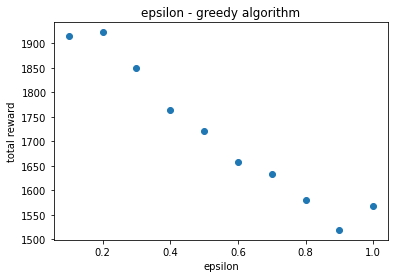

In [6]:
armsRewardForGivenTrial = lambda x : numpy.random.choice( ("s", "f"), p=[ x, 1-x])


successProbabilities = [ 0.01, 0.02 ] # Options success rates in Hindsight

totalRewardForEachEpsilon = []

for eEpsilon in numpy.arange(0.1, 1.1, 0.1):
    p = EpsilonGreedy( eEpsilon,[0,0],[0,0])
    for ee in range(100000):
        chosen_arm = p.select_arm() 
        p.update ( chosen_arm , 1 if armsRewardForGivenTrial(successProbabilities[chosen_arm]) == 's' else 0 )
    
    totalReward = sum( [ i*j for i,j in zip( p.counts, p.values)] )
    
    totalRewardForEachEpsilon.append( (p.epsilon, totalReward) )
    print ( "total reward:- {0:.2f}".format(  totalReward ) ,  " => ",  p)

import pandas
rewardsDF = pandas.DataFrame( totalRewardForEachEpsilon, columns=["epsilon", "total_reward"])

import matplotlib.pyplot as plt
plt.scatter(rewardsDF['epsilon'], rewardsDF['total_reward'])
plt.title("epsilon - greedy algorithm")
plt.xlabel("epsilon")
plt.ylabel("total reward")
plt.show() # Depending on whether you use IPython or interactive mode, etc.

#### When one of the arm is not so significantly better than the other arm ( like ~10% more effective )

total reward:- 1106.00  =>  EpsilonGreedy(0.10,[5183, 94817], [0.009261045726413284, 0.01115833658521152])
total reward:- 1044.00  =>  EpsilonGreedy(0.20,[85668, 14332], [0.010517346033524716, 0.009977672341613134])
total reward:- 1060.00  =>  EpsilonGreedy(0.30,[15393, 84607], [0.010394335087377343, 0.010637417707754794])
total reward:- 1097.00  =>  EpsilonGreedy(0.40,[20454, 79546], [0.010315830644372713, 0.011138209337992982])
total reward:- 1172.00  =>  EpsilonGreedy(0.50,[24921, 75079], [0.0103928413787569, 0.012160524247792348])
total reward:- 1015.00  =>  EpsilonGreedy(0.60,[69397, 30603], [0.010259809501851671, 0.009900990099009868])
total reward:- 1111.00  =>  EpsilonGreedy(0.70,[35003, 64997], [0.009942004971002564, 0.011739003338615673])
total reward:- 1077.00  =>  EpsilonGreedy(0.80,[40429, 59571], [0.010042296371416496, 0.011263870003860947])
total reward:- 1064.00  =>  EpsilonGreedy(0.90,[45101, 54899], [0.00980022615906521, 0.01132989671943021])
total reward:- 1027.00  =

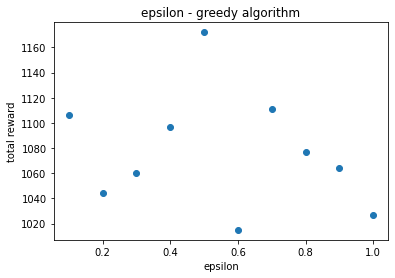

In [7]:
armsRewardForGivenTrial = lambda x : numpy.random.choice( ("s", "f"), p=[ x, 1-x]) # Bernoulli Arm


successProbabilities = [ 0.01, 0.011 ] # Options success rates in Hindsight

totalRewardForEachEpsilon = []

for eEpsilon in numpy.arange(0.1, 1.1, 0.1):
    egAlgo = EpsilonGreedy( eEpsilon,[0,0],[0,0])
    for ee in range(100000):
        chosen_arm = egAlgo.select_arm() 
        egAlgo.update ( chosen_arm , 1 if armsRewardForGivenTrial(successProbabilities[chosen_arm]) == 's' else 0 )
    
    totalReward = sum( [ i*j for i,j in zip( egAlgo.counts, egAlgo.values)] )
    
    totalRewardForEachEpsilon.append( (egAlgo.epsilon, totalReward) )
    print ( "total reward:- {0:.2f}".format(  totalReward ) ,  " => ",  egAlgo)

import pandas
rewardsDF = pandas.DataFrame( totalRewardForEachEpsilon, columns=["epsilon", "total_reward"])

import matplotlib.pyplot as plt
plt.scatter(rewardsDF['epsilon'], rewardsDF['total_reward'])
plt.title("epsilon - greedy algorithm")
plt.xlabel("epsilon")
plt.ylabel("total reward")
plt.show() # Depending on whether you use IPython or interactive mode, etc.

Comments:
- Total reward is decreasing with increasing in epsilon, but unlike in above two cases here we do not see clear pattern b/w total reward and epsilion

In [8]:
def epsilonGreedyPlots( successProbabilities, noOfTrails):
    armsRewardForGivenTrial = lambda x : numpy.random.choice( ("s", "f"), p=[ x, 1-x])
    totalRewardForEachEpsilon = []
    for eEpsilon in numpy.arange(0.1, 1.1, 0.1):
        egAlgo = EpsilonGreedy( eEpsilon )
        egAlgo.initialize( len(successProbabilities) )
        for ee in range(noOfTrails):
            chosen_arm = egAlgo.select_arm() 
            egAlgo.update ( chosen_arm , 1 if armsRewardForGivenTrial(successProbabilities[chosen_arm]) == 's' else 0 )

        totalReward = sum( [ i*j for i,j in zip( egAlgo.counts, egAlgo.values)] )

        totalRewardForEachEpsilon.append( (egAlgo.epsilon, totalReward) )
#         print ( "total reward:- {0:.2f}".format(  totalReward ) ,  " => ",  egAlgo)

    return pandas.DataFrame( totalRewardForEachEpsilon, columns=["epsilon", "total_reward"])

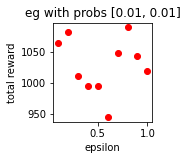

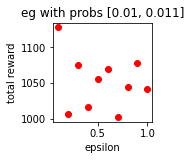

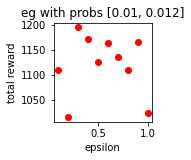

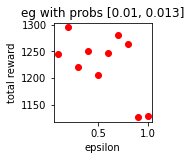

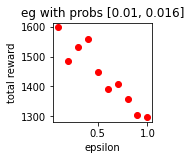

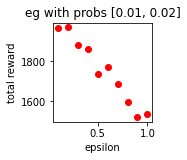

In [9]:
import numpy
import matplotlib.pyplot as plt
plt.figure(1 )

noOfTrails = 100000

successProbabilities = [ 0.01, 0.01 ] # Options success rates in Hindsight
rewardsDF = epsilonGreedyPlots( successProbabilities, noOfTrails )
plt.subplot(231)
plt.plot(rewardsDF['epsilon'], rewardsDF['total_reward'], 'ro' )
plt.title( "eg with probs {!r}". format(successProbabilities) )
plt.xlabel("epsilon")
plt.ylabel("total reward")

plt.show() # Depending on whether you use IPython or interactive mode, etc.

successProbabilities = [ 0.01, 0.011 ] # Options success rates in Hindsight
rewardsDF = epsilonGreedyPlots( successProbabilities, noOfTrails )
plt.subplot(232)
plt.plot(rewardsDF['epsilon'], rewardsDF['total_reward'], 'ro')
plt.title( "eg with probs {!r}". format(successProbabilities) )
plt.xlabel("epsilon")
plt.ylabel("total reward")
plt.show() # Depending on whether you use IPython or interactive mode, etc.

successProbabilities = [ 0.01, 0.012 ] # Options success rates in Hindsight
rewardsDF = epsilonGreedyPlots( successProbabilities, noOfTrails)
plt.subplot(233)
plt.plot(rewardsDF['epsilon'], rewardsDF['total_reward'], 'ro')
plt.title( "eg with probs {!r}". format(successProbabilities) )
plt.xlabel("epsilon")
plt.ylabel("total reward")
plt.show() # Depending on whether you use IPython or interactive mode, etc.


successProbabilities = [ 0.01, 0.013 ] # Options success rates in Hindsight
rewardsDF = epsilonGreedyPlots( successProbabilities, noOfTrails )
plt.subplot(234)
plt.plot(rewardsDF['epsilon'], rewardsDF['total_reward'], 'ro')
plt.title( "eg with probs {!r}". format(successProbabilities) )
plt.xlabel("epsilon")
plt.ylabel("total reward")
plt.show() # Depending on whether you use IPython or interactive mode, etc.

successProbabilities = [ 0.01, 0.016 ] # Options success rates in Hindsight
rewardsDF = epsilonGreedyPlots( successProbabilities, noOfTrails )
plt.subplot(235)
plt.plot(rewardsDF['epsilon'], rewardsDF['total_reward'], 'ro')
plt.title( "eg with probs {!r}". format(successProbabilities) )
plt.xlabel("epsilon")
plt.ylabel("total reward")
plt.show() # Depending on whether you use IPython or interactive mode, etc.

successProbabilities = [ 0.01, 0.02 ] # Options success rates in Hindsight
rewardsDF = epsilonGreedyPlots( successProbabilities, noOfTrails )
plt.subplot(236)
plt.plot(rewardsDF['epsilon'], rewardsDF['total_reward'], 'ro')
plt.title( "eg with probs {!r}". format(successProbabilities) )
plt.xlabel("epsilon")
plt.ylabel("total reward")
plt.show() # Depending on whether you use IPython or interactive mode, etc.
